<a href="https://colab.research.google.com/github/Kanishka96ac/Global-Happiness-Analysis/blob/main/Global_Happiness_Report_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the required Libraries


In [2]:
from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Access the dataset

In [3]:
happiness_Dataset = pd.read_csv('Happiness-Data.csv')

In [4]:
df2 = happiness_Dataset.copy()

# Display the DataFrame

In [5]:
df2.head(15)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.300,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
6,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.700,0.945,0.086,0.237,2.43,1.478,1.062,0.763,0.685,0.244,0.448,2.683
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.600,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.400,0.929,0.134,0.242,2.43,1.400,1.094,0.785,0.665,0.276,0.445,2.612
9,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.300,0.908,0.042,0.481,2.43,1.492,1.062,0.782,0.640,0.215,0.292,2.784


# Checking the Null values

In [6]:
df2.isnull().values.any()

np.False_

In [7]:
df2.shape

(149, 20)

In [8]:
df2.isnull().sum()

,0
Country name,0
Regional indicator,0
Ladder score,0
Standard error of ladder score,0
upperwhisker,0
lowerwhisker,0
Logged GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0


In [9]:
#sns.pairplot(df2)

# Checking the Summary Statistics

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [11]:
df2.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


 # Identify max/min Ladder score representing the Country with highest/lowest life satisfaction

In [12]:
df2.sort_values(['Ladder score'], ascending=False)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [13]:
df2["Ladder score"].max()

df2[df2["Ladder score"]==7.8420000000000005]

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual


In [ ]:
df2["Ladder score"].min()

df2[df2["Ladder score"]==2.523]

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.37,0.0,0.126,0.0,0.122,0.01,1.895


# Replacing the missing values
No any missing values there

In [14]:
df2

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


# Ignore the unwanted columns for the Survey

There are some unwanted columns for the original survey. In this section we can remove that unwanted columns and finalise the Dataframe.

The 'explained variable represent the features that explains the ladder score for instance 'df = df.eval('Sum = X + Y') for all columns (8 to 14) by rows equals rows in column (0) because each column represent the proportion of Ladder score they explain while the residual is the unexplained difference.

In [15]:
df_drp = df2.drop(labels=['Country name', 'Regional indicator','Standard error of ladder score','upperwhisker','lowerwhisker'], axis=1)

In [16]:
drp = df2.drop(labels=[ 'Standard error of ladder score','upperwhisker','lowerwhisker'], axis=1)
drp=drp.iloc[:,[0,1,2,3,4,5,6,7,8]]
drp.tail(15)

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
134,Madagascar,Sub-Saharan Africa,4.208,7.396,0.686,59.305,0.552,-0.005,0.803
135,Togo,Sub-Saharan Africa,4.107,7.362,0.569,54.914,0.619,0.032,0.772
136,Zambia,Sub-Saharan Africa,4.073,8.145,0.708,55.809,0.782,0.061,0.823
137,Sierra Leone,Sub-Saharan Africa,3.849,7.434,0.630,51.651,0.717,0.084,0.866
138,India,South Asia,3.819,8.755,0.603,60.633,0.893,0.089,0.774
139,Burundi,Sub-Saharan Africa,3.775,6.635,0.490,53.400,0.626,-0.024,0.607
140,Yemen,Middle East and North Africa,3.658,7.578,0.832,57.122,0.602,-0.147,0.800
141,Tanzania,Sub-Saharan Africa,3.623,7.876,0.702,57.999,0.833,0.183,0.577
142,Haiti,Latin America and Caribbean,3.615,7.477,0.540,55.700,0.593,0.422,0.721
143,Malawi,Sub-Saharan Africa,3.600,6.958,0.537,57.948,0.780,0.038,0.729


In [17]:
df_drp

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,7.620,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,7.571,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,7.554,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,7.464,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,3.415,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [18]:
d4=df_drp.iloc[:,[1,2,3,4,5,6,8,9,10,11,12,13,14]]
d4

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,10.775,0.954,72.000,0.949,-0.098,0.186,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,10.933,0.954,72.700,0.946,0.030,0.179,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,11.117,0.942,74.400,0.919,0.025,0.292,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,10.878,0.983,73.000,0.955,0.160,0.673,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,10.932,0.942,72.400,0.913,0.175,0.338,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,7.926,0.787,48.700,0.715,-0.131,0.915,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,9.782,0.784,59.269,0.824,-0.246,0.801,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,7.676,0.552,61.400,0.897,0.061,0.167,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,7.943,0.750,56.201,0.677,-0.047,0.821,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [19]:
df1=df_drp.iloc[:,[1,2,3,4,5,6]]

In [20]:
df1

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,10.775,0.954,72.000,0.949,-0.098,0.186
1,10.933,0.954,72.700,0.946,0.030,0.179
2,11.117,0.942,74.400,0.919,0.025,0.292
3,10.878,0.983,73.000,0.955,0.160,0.673
4,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...
144,7.926,0.787,48.700,0.715,-0.131,0.915
145,9.782,0.784,59.269,0.824,-0.246,0.801
146,7.676,0.552,61.400,0.897,0.061,0.167
147,7.943,0.750,56.201,0.677,-0.047,0.821


In [21]:
df1.shape

(149, 6)

In [22]:
df1

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,10.775,0.954,72.000,0.949,-0.098,0.186
1,10.933,0.954,72.700,0.946,0.030,0.179
2,11.117,0.942,74.400,0.919,0.025,0.292
3,10.878,0.983,73.000,0.955,0.160,0.673
4,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...
144,7.926,0.787,48.700,0.715,-0.131,0.915
145,9.782,0.784,59.269,0.824,-0.246,0.801
146,7.676,0.552,61.400,0.897,0.061,0.167
147,7.943,0.750,56.201,0.677,-0.047,0.821


# checking for outliers

<Figure size 5000x2000 with 0 Axes>

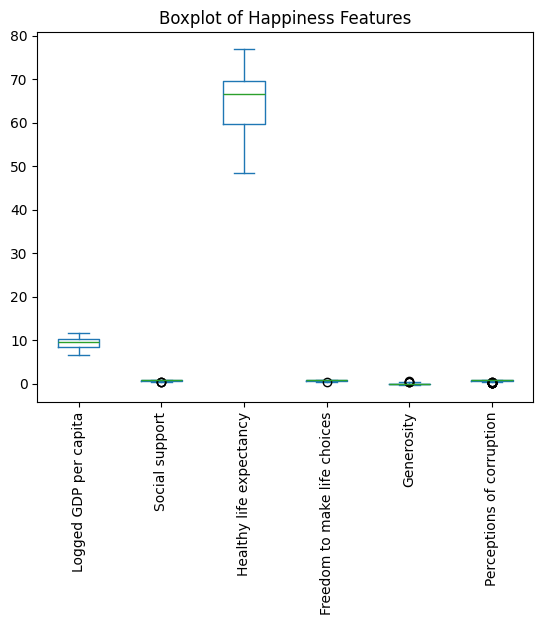

In [23]:
fig = plt.figure(figsize =(50, 20))
df1.plot.box(title='Boxplot of Happiness Features',rot=90)

plt.show()

# Box plot of attributes - Showing outliers

### Social Support

<Axes: ylabel='Social support'>

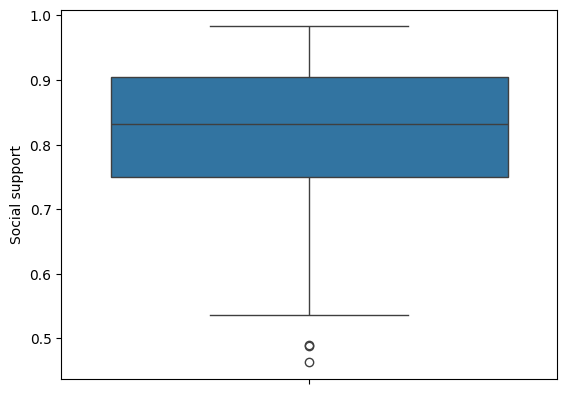

In [24]:
sns.boxplot(df1['Social support'])

In [25]:
print(np.where(df1['Social support']<0.52))

(array([ 98, 139, 148]),)


### Freedom to make life choices

<Axes: ylabel='Freedom to make life choices'>

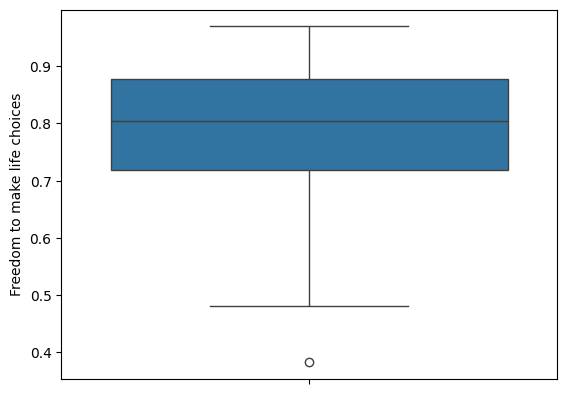

In [26]:
sns.boxplot(df1['Freedom to make life choices'])

In [27]:
print(np.where(df1['Freedom to make life choices']<0.4))

(array([148]),)


### Generosity

<Axes: ylabel='Generosity'>

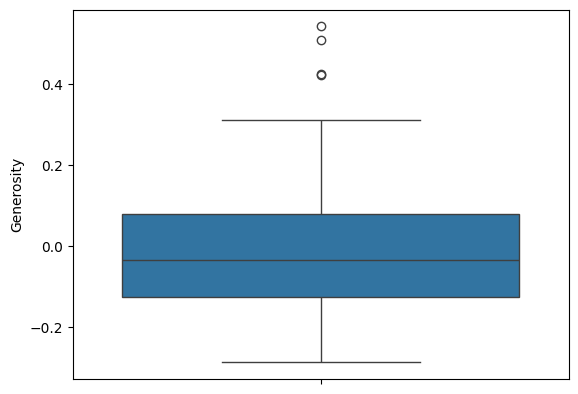

In [28]:
sns.boxplot(df1['Generosity'])

In [29]:
print(np.where(df1['Generosity']>0.4))

(array([ 81,  97, 125, 142]),)


### Perceptions of Corruption

<Axes: ylabel='Perceptions of corruption'>

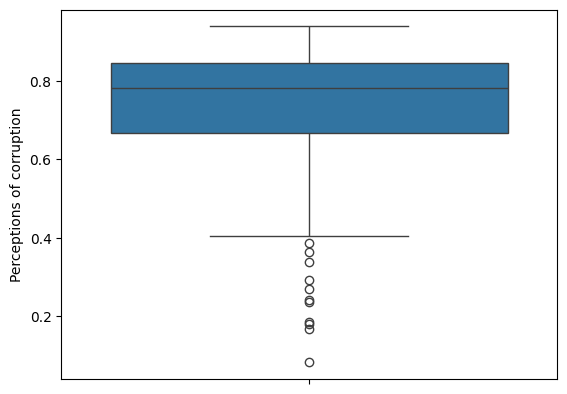

In [30]:
sns.boxplot(df1['Perceptions of corruption'])

In [31]:
print(np.where(df1['Perceptions of corruption']<=0.57))

(array([  0,   1,   2,   4,   5,   6,   7,   8,   9,  10,  12,  13,  14,
        16,  31,  39,  41,  76,  77,  89, 146]),)


In [32]:
df1

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,10.775,0.954,72.000,0.949,-0.098,0.186
1,10.933,0.954,72.700,0.946,0.030,0.179
2,11.117,0.942,74.400,0.919,0.025,0.292
3,10.878,0.983,73.000,0.955,0.160,0.673
4,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...
144,7.926,0.787,48.700,0.715,-0.131,0.915
145,9.782,0.784,59.269,0.824,-0.246,0.801
146,7.676,0.552,61.400,0.897,0.061,0.167
147,7.943,0.750,56.201,0.677,-0.047,0.821


# Drop the required Rows according to the results

### Social Support - Drops

In [33]:
df1.drop([98, 139, 148],inplace = True)

<ipython-input-33-b226eeab7c1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop([98, 139, 148],inplace = True)


### Generosity - Drops

In [34]:
df1.drop([ 81,  97, 125, 142],inplace = True)

<ipython-input-34-224a823781ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop([ 81,  97, 125, 142],inplace = True)


### Perception of corruption - Drops

In [35]:
df1.drop([1, 25, 27, 62, 73, 0,   1,   2,   4,   5,   6,   7,   8,   9,  10,  12,  13,  14,
         16,  31,  39,  41,  76,  77,  89, 146
       ],inplace = True)

<ipython-input-35-084a9b2ca455>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop([1, 25, 27, 62, 73, 0,   1,   2,   4,   5,   6,   7,   8,   9,  10,  12,  13,  14,


In [36]:
df1.shape

(117, 6)

In [37]:
df=df1.copy()

<Axes: ylabel='Perceptions of corruption'>

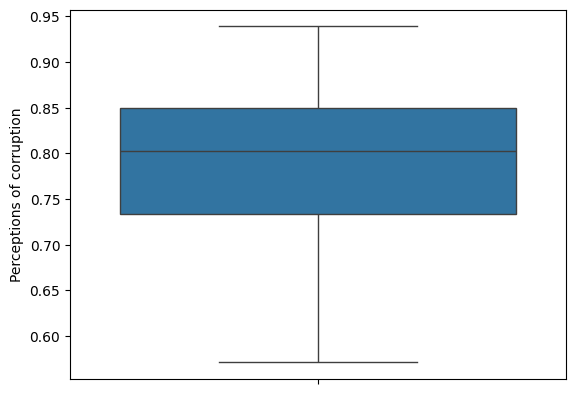

In [38]:
sns.boxplot(df['Perceptions of corruption'])

# Normalising the Dataset

In [39]:
# Preprocessing
from sklearn import preprocessing

In [40]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scale=scaler.fit_transform(df)

In [41]:
scale

array([[0.9498425 , 1.        , 0.92111787, 0.99164927, 0.77913043,
        0.27717391],
       [0.87642355, 0.90134529, 0.94001202, 0.66805846, 0.55478261,
        0.49456522],
       [0.70802035, 0.79372197, 0.8610172 , 0.94780793, 0.28173913,
        0.64673913],
       [0.87181972, 0.91928251, 0.83874239, 0.78914405, 0.13913043,
        0.80706522],
       [0.98497698, 0.85874439, 0.74081587, 0.74530271, 0.67130435,
        0.3451087 ],
       [0.93651563, 0.82735426, 0.89102998, 0.63256785, 0.23478261,
        0.20380435],
       [0.90768112, 0.90807175, 0.95868079, 0.71398747, 0.24521739,
        0.        ],
       [0.89920039, 0.72869955, 0.78945985, 0.92901879, 0.65565217,
        0.41032609],
       [0.90041192, 0.88340807, 0.89106754, 0.93319415, 0.73217391,
        0.22282609],
       [0.94814635, 0.80941704, 0.79340395, 0.63465553, 0.37913043,
        0.4076087 ],
       [1.        , 0.68834081, 0.70824882, 0.94363257, 0.62956522,
        0.04891304],
       [0.87545433, 0

In [42]:
df_normalize = scale

In [43]:
c=pd.DataFrame(df_normalize)
c.describe()

,0,1,2,3,4,5
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,0.567286,0.611418,0.589250,0.622968,0.431379,0.599847
std,0.251936,0.227176,0.238695,0.220561,0.221933,0.236144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.382845,0.464126,0.405341,0.490605,0.259130,0.440217
50%,0.604798,0.641256,0.665991,0.630480,0.384348,0.630435
75%,0.774655,0.793722,0.755728,0.797495,0.587826,0.758152
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Importing KMenas

In [44]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Create a PCA instance

In [46]:
pca = PCA(n_components=5)
p_Components = pca.fit_transform(df_normalize)

# Plot the explained variances

([<matplotlib.axis.XTick at 0x7edc1f354cd0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

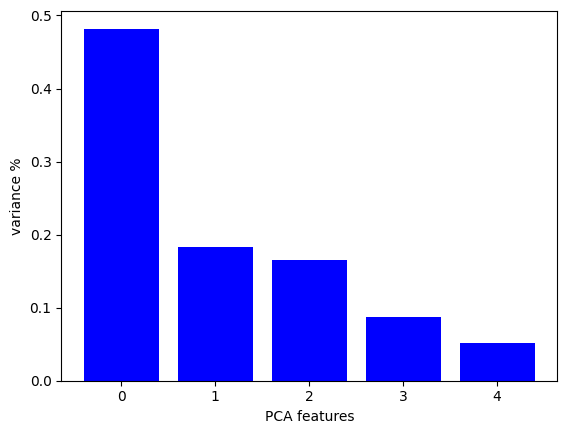

In [49]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

# Save components to the DataFrame

In [50]:
PCA_components = pd.DataFrame(p_Components)
PCA_components

,0,1,2,3,4
0,0.640558,-0.499605,0.250418,-0.197690,0.080707
1,0.510304,-0.105692,0.071077,-0.228396,-0.013751
2,0.431507,-0.036351,0.090109,0.227857,-0.040587
3,0.558384,0.244740,0.033515,0.177480,0.037567
4,0.449308,-0.297722,0.086415,-0.252479,0.077599
...,...,...,...,...,...
112,-0.469731,-0.702954,-0.051025,-0.105858,0.060074
113,-0.782460,-0.288585,-0.084555,0.145378,-0.249255
114,-0.560246,0.370851,0.049346,0.231030,0.302976
115,0.034677,0.117960,-0.194957,0.302753,0.075698


# Training the Model

In training the model we find the sum of square distance between each point and the centroid in a cluster. Optimal number of clusters will conrespond to this K value.

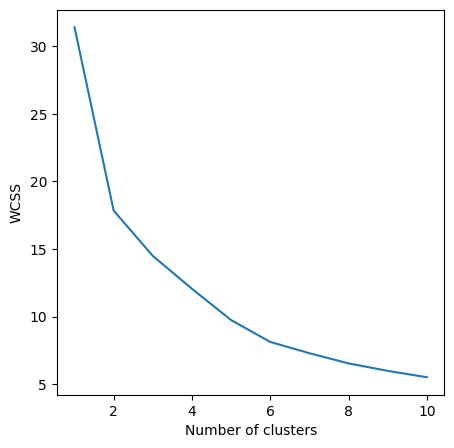

In [51]:
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(PCA_components.iloc[:,:3])
   wcss.append(model.inertia_)
plt.figure(figsize=(5,5))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# To check the optimal K using yellowbrick

/usr/local/lib/python3.11/dist-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.11/dist-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


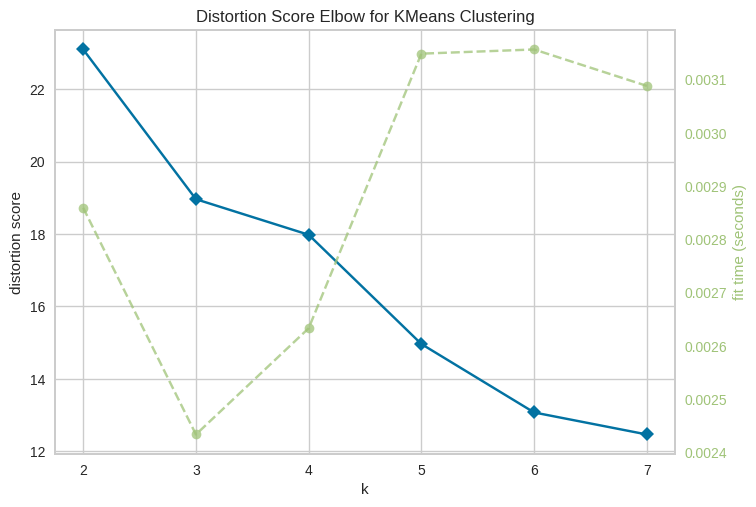

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(model, k=(2,8))
visualizer.fit(PCA_components)
visualizer.show()

# Training the K- mean Clustering model

In training the model we find the sum of square distance between each point and the centroid in a cluster. Optimal number of clusters will conrespond to this K value.

In [53]:
model = KMeans(n_clusters =3 ,init = "k-means++")
label = model.fit_predict(PCA_components.iloc[:,:3])
centers = np.array(model.cluster_centers_)
uniq = np.unique(label)

In [54]:
label

array([2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 2, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1], dtype=int32)

In [55]:
frame =PCA_components
frame['cluster'] = label
frame['cluster'].value_counts()

,count
cluster,
0,51
1,36
2,30


In [56]:
centers

array([[ 0.15105517,  0.17184509,  0.0781165 ],
       [-0.50359948, -0.06911372, -0.00921953],
       [ 0.34752558, -0.20920019, -0.12173461]])

In [57]:
uniq

array([0, 1, 2], dtype=int32)

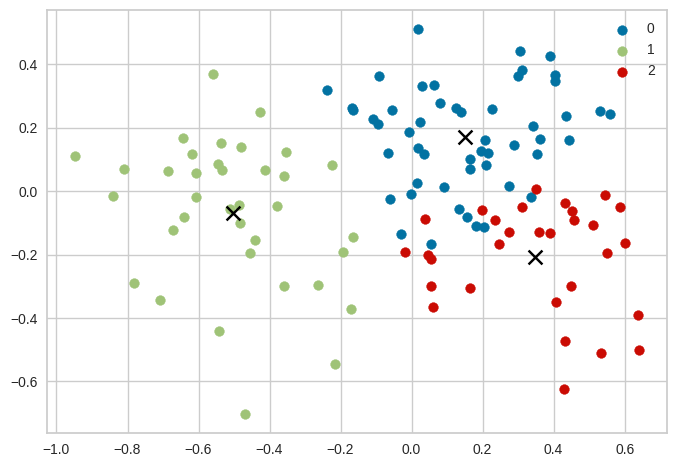

In [58]:
T=PCA_components.iloc[:,:3].values
for i in uniq:

    plt.scatter(T[label == i, 0] ,T[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='black',s=100)
# This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [59]:
frame.head(15)

,0,1,2,3,4,cluster
0,0.640558,-0.499605,0.250418,-0.197690,0.080707,2
1,0.510304,-0.105692,0.071077,-0.228396,-0.013751,2
2,0.431507,-0.036351,0.090109,0.227857,-0.040587,2
3,0.558384,0.244740,0.033515,0.177480,0.037567,0
4,0.449308,-0.297722,0.086415,-0.252479,0.077599,2
5,0.551283,-0.193999,-0.340216,-0.105583,0.027752,2
6,0.638895,-0.389017,-0.400367,-0.107626,0.085096,2
7,0.407948,-0.350363,0.173524,-0.069082,-0.055384,2
8,0.534732,-0.511734,0.144264,-0.186972,0.028461,2
9,0.458369,-0.092060,-0.127937,-0.138332,0.025330,2


# Store the values of PCA component in vairaible

In [60]:
xvector =  pca.components_[0] * max(T[0])
yvector =  pca.components_[1] * max(T[1])
col = df.columns

In [61]:
col

Index(['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

# Plot the 'name of individual features' along with vector length

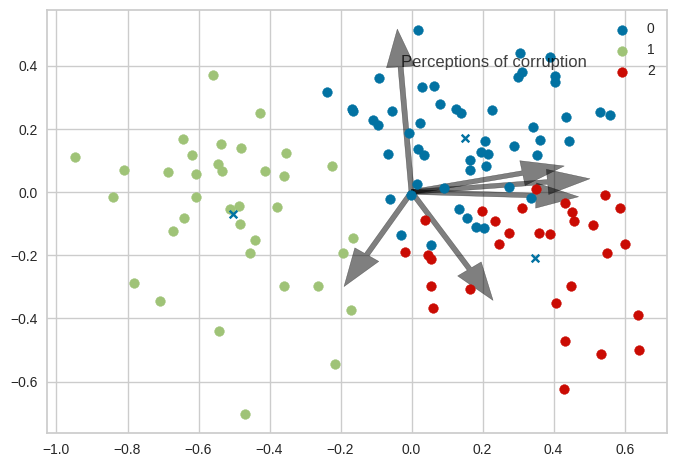

In [62]:
# plot the 'name of individual features' along with vector length
for i in range(len(col)):
    # plot arrows

    plt.arrow(0, 0, xvector[i], yvector[i],
                color='black', width=0.015,
                head_width=0.08, alpha=0.5
            )
    # plot name of features
plt.text(xvector[i], yvector[i], list(col)[i], color='black', alpha=0.75)

#T=PCA_components.iloc[:,:3].values

for i in uniq:

    plt.scatter(T[label == i, 0] ,T[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='b',s=30)
#This is done to find the centroid for each clusters.

plt.legend()
plt.show()

# Hierachical Clustering

In [63]:
df1.shape

(117, 6)

In [64]:
df0 = df1.copy()

In [65]:
df0

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
3,10.878,0.983,73.000,0.955,0.160,0.673
11,10.575,0.939,73.503,0.800,0.031,0.753
15,9.880,0.891,71.400,0.934,-0.126,0.809
17,10.556,0.947,70.807,0.858,-0.208,0.868
18,11.023,0.920,68.200,0.837,0.098,0.698
...,...,...,...,...,...,...
141,7.876,0.702,57.999,0.833,0.183,0.577
143,6.958,0.537,57.948,0.780,0.038,0.729
144,7.926,0.787,48.700,0.715,-0.131,0.915
145,9.782,0.784,59.269,0.824,-0.246,0.801


In [66]:
df0.shape

(117, 6)

In [67]:
h=df0.copy()

<Figure size 2000x2000 with 0 Axes>

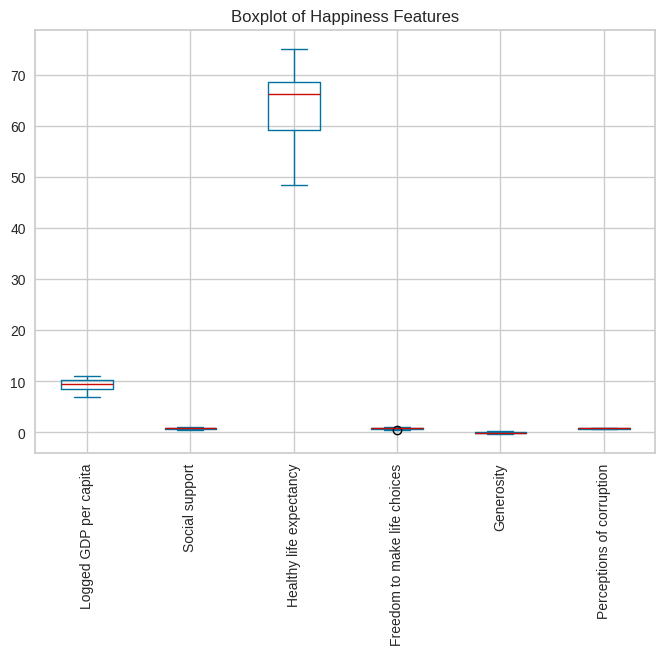

In [68]:
fig = plt.figure(figsize =(20, 20))
h.plot.box(title='Boxplot of Happiness Features',rot=90)

plt.show()

In [69]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scale=scaler.fit_transform(h)

In [70]:
h_norm=scale.copy()

In [71]:
pca = PCA(n_components=5)
h_Components = pca.fit_transform(h_norm)

([<matplotlib.axis.XTick at 0x7edc1c114d10>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

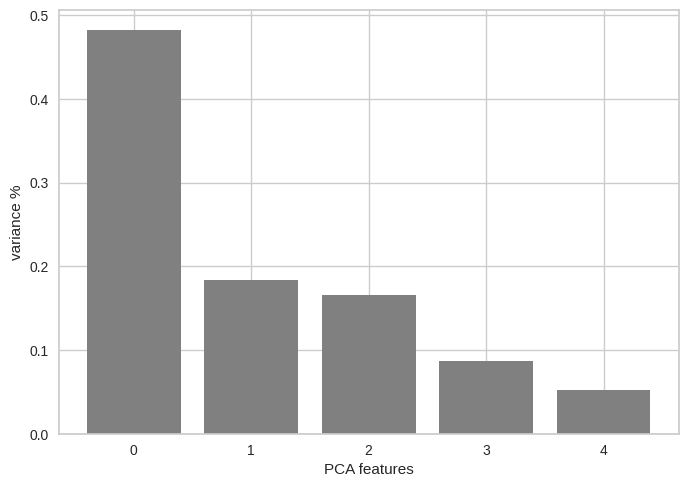

In [73]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='grey')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [74]:
PCA_components = pd.DataFrame(h_Components)
PCA_components
#k=PCA_components
k=(PCA_components.iloc[:,:3])

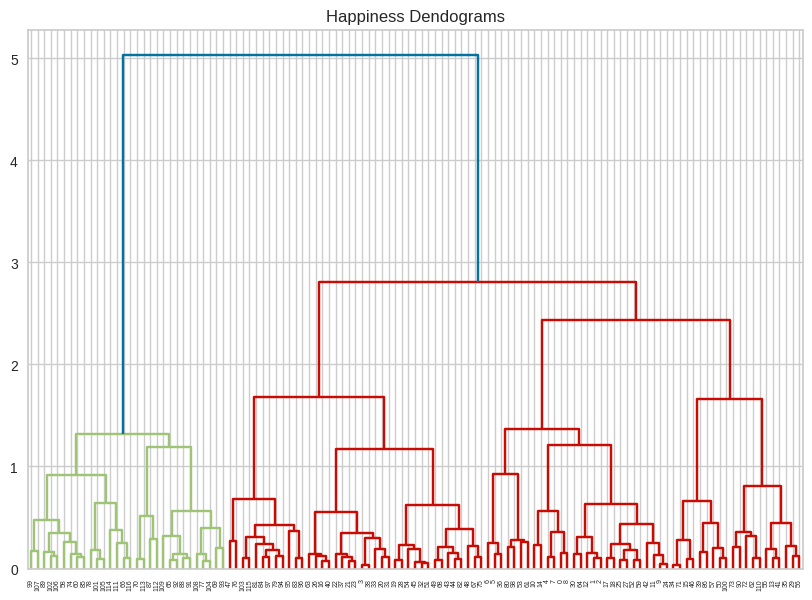

In [75]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Happiness Dendograms")
dend = shc.dendrogram(shc.linkage(k, method='ward'))

In [77]:
from sklearn.cluster import AgglomerativeClustering

cluster_agg = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
lbl = cluster_agg.fit_predict(k)
uniqs = np.unique(lbl)


In [78]:
lbl.shape

(117,)

In [79]:
uniqs

array([0, 1, 2])

In [80]:
label.shape

(117,)

In [81]:
frame['cluster_agg'] = lbl
frame['cluster_agg'].value_counts()

,count
cluster_agg,
0,48
2,39
1,30


In [82]:
frame.shape

(117, 7)

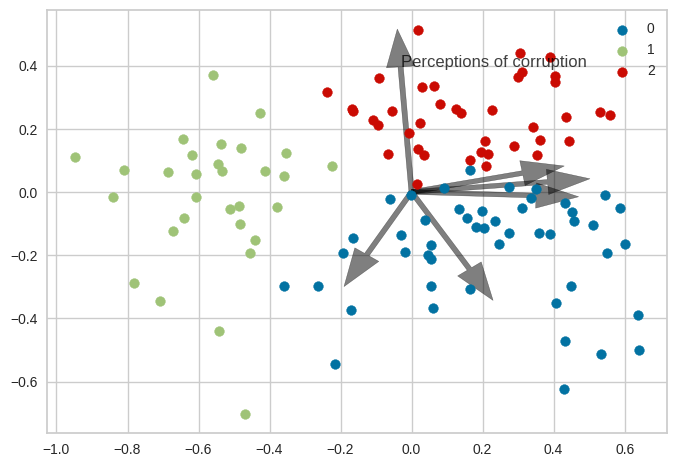

In [83]:
# plot the 'name of individual features' along with vector length
for i in range(len(col)):
    # plot arrows

    plt.arrow(0, 0, xvector[i], yvector[i],
                color='black', width=0.015,
                head_width=0.08, alpha=0.5
            )
    # plot name of features
plt.text(xvector[i], yvector[i], list(col)[i], color='black', alpha=0.75)

for i in uniqs:

    plt.scatter(T[lbl == i, 0] ,T[lbl == i , 1] , label = i)

plt.legend()
plt.show()

In [84]:
print(centers[:,0])

[ 0.15105517 -0.50359948  0.34752558]
